In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [64]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

       x1    x2    x3    x4
0    4.77  0.92  6.79 -2.02
1    4.77  0.96  8.98 -3.06
2    4.77  1.17  9.37 -2.93
3    4.77  1.16  9.12 -2.82
4    4.77  1.24  9.08 -2.68
..    ...   ...   ...   ...
195  4.77  0.69  8.55 -3.23
196  4.77  0.86  8.71 -3.06
197  4.77  0.81  8.62 -3.10
198  4.77  0.86  8.49 -2.95
199  4.77  0.98  7.08 -2.07

[200 rows x 4 columns]
       y1    y2    y3    y4
0    1.06  0.08  0.00  1.03
1    1.06  1.10  1.72  0.80
2    1.06 -0.12 -0.08  1.04
3    1.06  0.91  1.27  0.86
4    1.06  1.00  1.07  1.11
..    ...   ...   ...   ...
195  1.06  0.98  1.06  0.93
196  1.06  0.81  1.79  1.10
197  1.06  0.87  1.19  0.86
198  1.06  0.17  0.01  1.04
199  1.06  0.88  2.06  0.87

[200 rows x 4 columns]


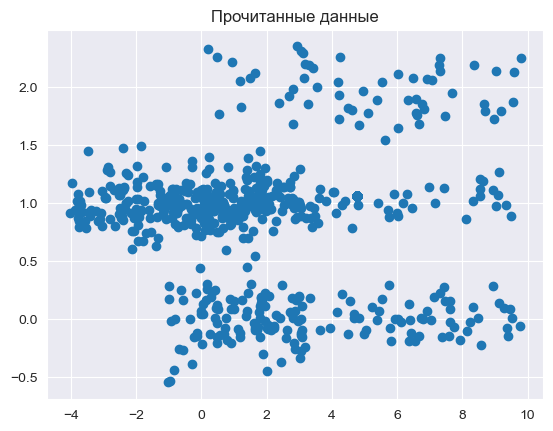

In [65]:
#Проверяем размерность
print(x_data.shape)
print(y_data.shape)

In [66]:
# import matplotlib.pyplot as plt
from scipy.spatial import distance

euclidean = distance.cdist(x_data, y_data, 'euclidean')  ## Возвращает матрицу всех попарных расстояний.
euclidean

[[ 8.35920451  6.88867186  8.45021893 ...  7.3089671   8.34617278
   6.67013493]
 [10.57861049  9.02169053 10.6688378  ...  9.47748384 10.56688696
   8.78076306]
 [10.88258701  9.28463246 10.97686658 ...  9.75349168 10.86897419
   9.04014934]
 ...
 [10.27902233  8.75603792 10.366224   ...  9.20077171 10.26866106
   8.51842122]
 [10.1140002   8.58586629 10.20242618 ...  9.03162776 10.1030045
   8.34876039]
 [ 8.62035382  7.12355248  8.7127378  ...  7.55335687  8.60681126
   6.90058693]]


### Матрица расстояний
![Основные функции растояний](img.png)

## Евклидово расстояние - 
### Числовые данные с высокой размерностью: Евклидово расстояние может страдать от "проклятия размерности", когда расстояния становятся менее значимыми

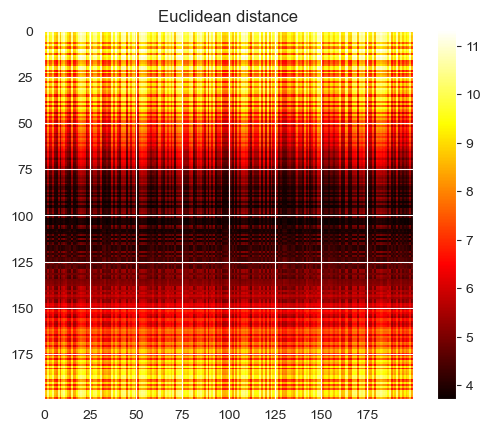

In [67]:
plt.imshow(euclidean,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Euclidean distance', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=1000, bbox_inches='tight')
plt.show()

###  Cosine similarity
#### Измеряет косинус угла между векторами. Полезно для текстовых данных или других многомерных данных, где величина векторов менее важна, чем их направление.

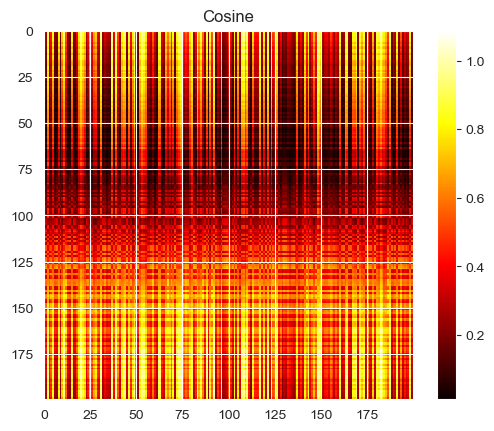

In [68]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cos')

plt.imshow(d,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Cosine', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

### Манхэттенская метрика
#### Часто используется в высокоразмерных пространствах из-за лучшей устойчивости к выбросам.

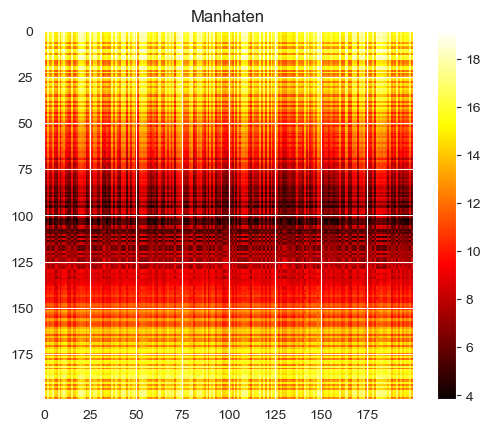

In [69]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cityblock')

plt.imshow(d,cmap='hot',interpolation='nearest')
plt.colorbar()

plt.title('Manhaten', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

KeyboardInterrupt: 

In [75]:
# Среднее значение по каждому столбцу
# Параметр skipna=True игнорирует NaN значения.
mean_values = df.mean(skipna=True)
mean_values

array([[ 8.87406593,  7.41923077,  9.06120879,  7.64494505,  7.90538462,
         8.92065934,  7.36879121,  7.29318681,  8.75923077,  7.25703297,
         8.58824176,  9.05087912,  8.16703297,  7.42582418,  7.24164835,
         8.77208791,  7.24956044,  7.30626374,  7.87934066,  8.85384615,
         9.15571429,  8.94164835,  8.67340659,  7.46318681,  7.85692308,
         8.71989011,  7.90571429,  8.57164835,  8.64076923,  7.83505495,
         7.73208791,  9.09945055,  7.34      ,  7.6456044 ,  7.62318681,
         7.48648352,  7.37692308,  9.17714286,  7.79241758,  9.13351648,
         8.08384615,  7.4832967 ,  8.90384615,  9.02021978,  8.94747253,
         7.44043956,  8.92120879,  7.90373626,  8.7243956 ,  9.19978022,
         8.0732967 ,  7.33450549,  8.86021978,  9.21912088,  9.0267033 ,
         8.89516484,  7.83406593,  7.89461538,  7.60604396,  8.18      ,
         7.82230769,  7.3510989 ,  8.97362637,  8.93615385,  7.76725275,
         7.50241758,  8.78648352,  8.29318681,  8.7

In [ ]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
mean_values_small_values = mean_values.copy()
mean_values_small_values = mean_values_small_values.drop('Размер кредита(тыс. руб.)')
mean_values_small_values = mean_values_small_values.drop('Оценка автомобиля заемщика')
mean_values_small_values = mean_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Стандартное отклонение по каждому столбцу
std_values = df.std(skipna=True)
std_values

In [ ]:
# Создаем гистограмму, что посмотреть как соотносятся данные
plt.figure(figsize=(15, 6))
std_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Стандартное отклонение значений по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Отклонение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
std_values_small_values = std_values.copy()
std_values_small_values = std_values_small_values.drop('Размер кредита(тыс. руб.)')
std_values_small_values = std_values_small_values.drop('Оценка автомобиля заемщика')
std_values_small_values = std_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
std_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Медиана по каждому столбцу
median_values = df.median(skipna=True)
median_values

In [ ]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Медианные значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Медианные значения')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
median_values_small_values = std_values.copy()
median_values_small_values = median_values_small_values.drop('Размер кредита(тыс. руб.)')
median_values_small_values = median_values_small_values.drop('Оценка автомобиля заемщика')
median_values_small_values = median_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Расчет квартилей (25%, 50%, 75%)
quantiles = df.quantile([0.25, 0.5, 0.75], interpolation='midpoint')
quantiles

In [ ]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Квартили значений по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Квартили')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
quantiles_small_values = quantiles.copy()
quantiles_small_values = quantiles_small_values.drop('Размер кредита(тыс. руб.)', axis=1)
quantiles_small_values = quantiles_small_values.drop('Оценка автомобиля заемщика', axis=1)
quantiles_small_values = quantiles_small_values.drop('Доход', axis=1)
# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles_small_values.plot(kind='bar', color=['skyblue', 'blue', 'orange'],
                            y=["Возраст(лет)", "Количество иждивенцев", "Срок проживания в регионе"])

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Вычисление корреляции
correlation_matrix = df.corr()
correlation_matrix

In [ ]:
# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
# Пары диаграмм (Pairplot)
sns.pairplot(df)
plt.show()

In [ ]:
from scipy.stats import skew

# Вычисление коэффициент асимметрии
skewness = skew(df['Возраст(лет)'].dropna())
print(f'Коэффициент асимметрии для Возраст(лет): {skewness}')

skewness2 = skew(df['Количество иждивенцев'].dropna())
print(f'Коэффициент асимметрии для Количество иждивенцев: {skewness2}')

skewness3 = skew(df['Доход'].dropna())
print(f'Коэффициент асимметрии для Доход: {skewness3}')

skewness4 = skew(df['Срок проживания в регионе'].dropna())
print(f'Коэффициент асимметрии для Срок проживания в регионе: {skewness4}')

skewness5 = skew(df['Оценка автомобиля заемщика'].dropna())
print(f'Коэффициент асимметрии для Оценка автомобиля заемщика: {skewness5}')

skewness6 = skew(df['Размер кредита(тыс. руб.)'].dropna())
print(f'Коэффициент асимметрии для Размер кредита(тыс. руб.): {skewness6}')

In [ ]:
# Межквартильный размах
Q3 = quantiles['Возраст(лет)'].array[2]
Q1 = quantiles['Возраст(лет)'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Возраст(лет)'] < (Q1 - 1.5 * IQR)) | (df['Возраст(лет)'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Возраст(лет): {len(outliers)}')

###################################################################################################
Q3 = quantiles['Количество иждивенцев'].array[2]
Q1 = quantiles['Количество иждивенцев'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Количество иждивенцев'] < (Q1 - 1.5 * IQR)) | (df['Количество иждивенцев'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Количество иждивенцев: {len(outliers)}')
#######################################################################################################
Q3 = quantiles['Количество иждивенцев'].array[2]
Q1 = quantiles['Количество иждивенцев'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Количество иждивенцев'] < (Q1 - 1.5 * IQR)) | (df['Количество иждивенцев'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Количество иждивенцев: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Доход'].array[2]
Q1 = quantiles['Доход'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Доход'] < (Q1 - 1.5 * IQR)) | (df['Доход'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Доход: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Срок проживания в регионе'].array[2]
Q1 = quantiles['Срок проживания в регионе'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[
    (df['Срок проживания в регионе'] < (Q1 - 1.5 * IQR)) | (df['Срок проживания в регионе'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Срок проживания в регионе: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Оценка автомобиля заемщика'].array[2]
Q1 = quantiles['Оценка автомобиля заемщика'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[
    (df['Оценка автомобиля заемщика'] < (Q1 - 1.5 * IQR)) | (df['Оценка автомобиля заемщика'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Оценка автомобиля заемщика: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Размер кредита(тыс. руб.)'].array[2]
Q1 = quantiles['Размер кредита(тыс. руб.)'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[
    (df['Размер кредита(тыс. руб.)'] < (Q1 - 1.5 * IQR)) | (df['Размер кредита(тыс. руб.)'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Размер кредита(тыс. руб.): {len(outliers)}')


## **Выводы анализа:**

* Однородность
    По гистрограмам средних и медианых значений видно, что они близки. Посчитав межквартильный размах и пары диаграмм эта теория подтвердилась. Также это видно на диаграмме квартелей.
* Близкое к симметричному распределению.
    На это указывают низкие коэффициенты ассиметрии у данных.
* Малое колличество выбросов
    Данный вывод сделан на основе пары диаграмм и меквартильного размаха.
* Колличество иждевенцев зависят от
    * Срока проживания в регионе
    * Возраста
    * Размера кредита
    * Оценки авто
    * Дохода
* Срок проживания в регионе зависит от
    * Возраста
    * Колличества иждевенцев
* Размер кредита зависит от
    * Дохода
    * Количества иждевенцев
* Оценка автомобиля зависит от
    * Размера кредита
    * Дохода
    * Колличества иждевенцев
* Возраст зависит от
    * Срока проживания в регионе
    * Колличества иждевенцев
* Доход зависит от
    * Размера кредита
    * Оценки авто
    * Колличества иждевенцев

In [ ]:
from sklearn.impute import KNNImputer

# Импутация методом ближайших соседей (KNN)
imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_knn

In [ ]:
# Центрирование данных (вычитание среднего)
# Вычесть среднее значение каждого признака из значений признака, чтобы все признаки имели среднее значение 0.
mean_centered_df = df_knn - df_knn.mean()

# Нормировка данных, чтобы евклидова норма каждого признака была равна 1
# Нормировка: Разделить каждый признак на его евклидову норму, чтобы каждый признак имел евклидову норму, равную 1
Z = mean_centered_df.apply(lambda x: x / np.sqrt(np.sum(x ** 2)), axis=0)

Z

In [ ]:
# Вычисление сингулярного разложения
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
U

In [ ]:
# Вычисление объясненной дисперсии с использованием сингулярных значений
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Результаты
print("Объясненная дисперсия для каждого фактора:", explained_variance_ratio)
print("Накопленная объясненная дисперсия:", cumulative_explained_variance)

# Поиск количества факторов, достаточных для объяснения 90% дисперсии
threshold = 0.9
k = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Количество факторов для объяснения {threshold * 100}% дисперсии: {k}")
np.sum(explained_variance_ratio[:k])

In [ ]:
# Уменьшенная версия матрицы Z
U_k = U[:, :k]
S_k = np.diag(S[:k])
V_k_t = Vt[:k, :]
Z_k = np.dot(U_k, np.dot(S_k, V_k_t))
Z_k

In [ ]:
# Вычисление погрешности
error_matrix = Z - Z_k

# Операторная (спектральная) норма — это максимальное сингулярное значение ошибки
spectral_norm = np.linalg.norm(error_matrix, ord=2)

# Норма Фробениуса
frobenius_norm = np.linalg.norm(error_matrix, 'fro')

# Результаты
print(f"Операторная норма ошибки: {spectral_norm}")
print(f"Норма Фробениуса ошибки: {frobenius_norm}")

In [ ]:
# Представление клиентов в новом пространстве
Z_reduced = U[:, :k] @ np.diag(S[:k])
V_k_t

In [ ]:
# Визуализация для 0 и 1
if k >= 2:
    plt.scatter(Z_reduced[:, 0], Z_reduced[:, 1])
    plt.title('2D Representation of Data')
    plt.xlabel('u1')
    plt.ylabel('u2')
    plt.show()

### Выводы о клиентах банка:

- Только 3 характеристики из набора являются основными, т.к. объясняют 97 процентов дисперсии
- Карта клиентов показывает, что существуют группы, в которые объединены клиенты.
- Карта клиентов так же показывает выбросы, на которые стоит обратить внимание как на нетипичных пользователей.
- Норма Фрабениуса равную 0.37 будем считать приемлимой для задачи анализа данных клиентов, что говорит о том, что меньшая размерность неплохо объясняет данные.

In [ ]:
# MDS
# 9. Вычисление расстояний
dist_matrix = pairwise_distances(Z, metric='euclidean')

# 10. MDS для проекции в 2D
mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto')
X_2d_mds = mds.fit_transform(dist_matrix)

# Оценка погрешности (стресс MDS)
stress = mds.stress_
print(f"Стресс размещения MDS: {stress}")

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_mds[:, 0], X_2d_mds[:, 1])
plt.title("Карта клиентов (MDS)")
plt.xlabel("u1")
plt.ylabel("u2")
plt.show()

Стресс > 0.2: Плохое соответствие, необходимо больше измерений или MDS плохо работает для этих данных.

В общем график походж на график SVD разложения


In [ ]:
loading_matrix = Vt.T[:, :k].dot(np.diag(S[:k]))

print('Loading matrix:n')
for i, feature in enumerate(Z.columns):
    pad = 14 - len(feature)
    print(f'(z{i + 1}) {feature}' + ' ' * pad +
          f'= {loading_matrix[i, 0]:.2f}*u1 + {loading_matrix[i, 1]:.2f}*u2 + {loading_matrix[i, 2]:.2f}*u3')


1. u1:
   - Наибольшие положительные влияния оказывают:
     - Количество иждивенцев (z2: 0.80)
     - Доход (z3: 0.80)
     - Оценка автомобиля заемщика (z5: 0.82)
     - Размер кредита (z6: 0.89)
   - Этот фактор (u1) тесно связан с финансовыми аспектами и оценкой имущества.

2. u2:
   - Наибольшие отрицательные влияния оказывают:
     - Возраст (z1: -0.82)
     - Срок проживания в регионе (z4: -0.87)
   - Этот фактор (u2) связан с демографическими признаками и стабильностью проживания.

3. u3:
   - Все коэффициенты относительно малы, что может указывать на то, что этот фактор (u3) менее значим в сравнении с u1 и u2, или влияет на разнообразные аспекты с меньшей интенсивностью.

### Группы признаков:

- Фактор u1 связан с:
  - Финансовыми показателями: Количество иждивенцев, Доход, Оценка автомобиля, Размер кредита.

- Фактор u2 связан с:
  - Демографическими и социально-стабильными показателями: Возраст, Срок проживания в регионе.

- Фактор u3 не выделяется как доминирующий для каких-либо конкретных признаков, так как его значения малы по сравнению с другими факторами.

### Интерпретация главных факторов:

1. Фактор u1 (Финансовый профиль клиента):
   - Описание: Этот фактор указывает на финансовую состоятельность клиента. Высокие коэффициенты для таких показателей, как количество иждивенцев, доход, оценка автомобиля и размер кредита, свидетельствуют о его связи с финансовыми аспектами жизни клиентов. u1 может отражать уровень материального благосостояния или потенциальные риски, связанные с большими финансовыми обязательствами.

2. Фактор u2 (Демографическая устойчивость):
   - Описание: u2 отражает стабильность и демографические аспекты, такие как возраст и срок проживания в регионе. Отрицательные коэффициенты показывают, что более молодые и недавно переехавшие клиенты оказывают меньший вклад в этот фактор.

3. Фактор u3 (Второстепенные влияния):
   - Описание: u3 не имеет значительных коэффициентов по сравнению с другими факторами, что показывает, что он не оказывает существенного воздействия на какие-то конкретные аспекты. Он может указывать на разнообразные и менее значимые влияния.

### Интерпретация карты клиентов:

- Сегмент 1: Высокое u1 и u2 — клиенты с высокой финансовой стабильностью и демографической устойчивостью, идеальные для долгосрочных финансовых продуктов.
- Сегмент 2: Высокое u1 и низкое u2 — клиенты с высокой финансовой активностью, но с меньшей демографической стабильностью, мишень для мобильных и гибких решений.
- Сегмент 3: Низкое u1 и высокое u2 — клиенты с небольшими финансовыми потребностями, но стабильные, потенциально верные долгосрочные партнеры.
- Сегмент 4: Низкое u1 и u2 — клиенты, у которых отсутствуют выраженные финансовые и демографические преимущества, требуют индивидуального подхода